/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.3803
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1395
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1136
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0980
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0747
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0545
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0271
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1460e-04
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4406e-04
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8554e-04
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7328e-04
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2512e-04
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6051

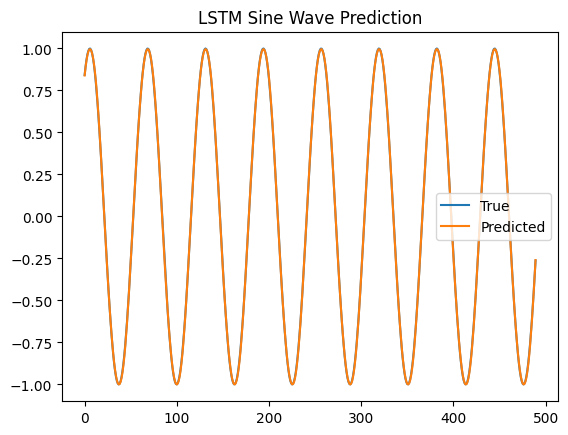

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate sine wave data
x = np.linspace(0, 50, 500)
y = np.sin(x)

# Prepare input/output sequences
def create_dataset(data, step=10):
    X, Y = [], []
    for i in range(len(data) - step):
        X.append(data[i:i+step])
        Y.append(data[i+step])
    return np.array(X), np.array(Y)

step = 10
X, Y = create_dataset(y, step)

# Reshape to [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(step, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, epochs=20, verbose=1)

# Predict
pred = model.predict(X)

# Plot original and predicted
plt.plot(Y, label="True")
plt.plot(pred, label="Predicted")
plt.legend()
plt.title("LSTM Sine Wave Prediction")
plt.show()
